In [1]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-01-25.csv', header=None)

In [3]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-01-25/"+str(i)+"/data_structures_NQI_results2018-01-25.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [4]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


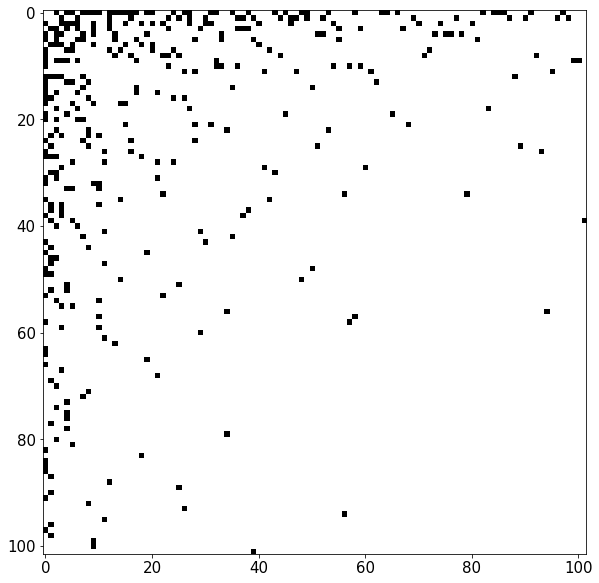

In [22]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [7]:
# import the simulated network
# load the dict of dataframes
with open('simulation_100/simulation_100.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [8]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_100/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_100/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_100/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_100/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [23]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
  #  fig = pyplot.figure(figsize=(10, 10)) # in inches
  #  pyplot.imshow(adjacency_matrix,
   #               cmap="Greys",
  #                interpolation="none")
    
    fig = plt.figure(figsize=(10, 10))  # in inches
    plt.imshow(adjacency_matrix, cmap="Greys", interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    
    
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)
    plt.savefig('figure3_4.pdf')
    plt.show()

In [10]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k]  
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [11]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [47]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [48]:
def likelihood(params, real_data, simulated_data,uncertainty):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data

    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [49]:
parameter_LIST = {}
for i in tqdm(range(len(simutable))):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.59s/it]


In [26]:
all_arrays = [array for outer_dict in parameter_LIST.values() for inner_dict in outer_dict.values() for array in inner_dict.values()]

# Concatenate all arrays into a single array
all_data = np.concatenate(all_arrays)

# Calculate the standard deviation for each variable
# Calculate the standard deviation for each variable
uncertaintylist=[]
for i in range(3):
    std_variable = np.nanstd(all_data[i::3])  # Variable 0 is at every 3rd index
    uncertaintylist.append(std_variable)

print("Standard Deviation of Variable 0:", std_variable_0)
print("Standard Deviation of Variable 1:", std_variable_1)
print("Standard Deviation of Variable 2:", std_variable_2)

NameError: name 'std_variable_0' is not defined

In [ ]:
uncertaintylist

In [50]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])
            uncertainty=uncertaintylist

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data,uncertainty)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
                
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_31644/2940148915.py:16: RuntimeWarning: divide by zero encountered in divide
  squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Li

Likelihood: 4.068139452074803e-37
Likelihood: 1.7088526243007084e-42
Likelihood: 1.047950601729676e-59
Likelihood: 2.2773984995515822e-35
Likelihood: 2.775116781392679e-67
Likelihood: 0.0014781543256257022
Likelihood: 8.802502077343765e-48
Likelihood: 6.031654026178937e-39
Likelihood: 2.105354267012627e-116
Likelihood: 1.047950601729676e-59
Likelihood: 4.1036569620820775e-87
Likelihood: 3.204901661578111e-298
Likelihood: 2.2773984995515822e-35
Likelihood: 3.112366611392179e-32
Likelihood: 2.807465293593075e-53
Likelihood: 4.762670866363681e-43
Likelihood: 4.1036569620820775e-87
Likelihood: 6.031654026178937e-39
Likelihood: 8.802502077343765e-48
Likelihood: 4.007128308035611e-195
Likelihood: 2.247987042438265e-37
Likelihood: 5.01605097702499e-27
Likelihood: 5.5327270483532744e-36
Likelihood: 6.031654026178937e-39
Likelihood: 2.807465293593075e-53
Likelihood: 1.8010865324701106e-29
Likelihood: 2.775116781392679e-67
Likelihood: 5.975853537496842e-51
Likelihood: 4.762670866363681e-43
Likel

Likelihood: 0.024798112221778378
Likelihood: 0.9529562381848538
Likelihood: 0.013658287633368753
Likelihood: 3.8408822571640625e-08
Likelihood: 0.00047128318922341983
Likelihood: 0.009990277552951642
Likelihood: 0.04098031977837639
Likelihood: 0.0003982258042763632
Likelihood: 0.8234704395629071
Likelihood: 9.685374923649776e-05
Likelihood: 0.9694243098422511
Likelihood: 0.002280500954754435
Likelihood: 0.953926563949067
Likelihood: 0.0010190953110515055
Likelihood: 0.06481646483359416
Likelihood: 0.9651985442074602
Likelihood: 0.0009617378829559431
Likelihood: 0.8810612866695986
Likelihood: 0.2905639860156949
Likelihood: 0.43872510858544916
Likelihood: 0.0032771936115536236
Likelihood: 0.0004140388522696875
Likelihood: 0.004832817913042478
Likelihood: 0.7263755990153392
Likelihood: 0.9410248527606885
Likelihood: 0.37937513286627284
Likelihood: 0.00018319302786906898
Likelihood: 0.4152963252968367
Likelihood: 0.04389661446947893
Likelihood: 0.15561237837448488
Likelihood: 0.01265127366

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 4.007128308035611e-195
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 4.2728247818312435e-162
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 1.504226629822627e-136
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 4.007128308035611e-195
Likelihood: 2.990438636820139e-100
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 2.990438636820139e-100
Likelihood: 4.1036569620820775e-87
Likelihood: 2.105354267012627e-116
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 2.105354267012627e-116
Likelihood: 1.504226629822627e-136
Likelihood: 8.189454266780048e-239
Lik

Likelihood: 5.992109848833113e-07
Likelihood: 1.1720580021561036e-07
Likelihood: 1.1519565758907415e-07
Likelihood: 3.094243762278738e-05
Likelihood: 1.4600628493472528e-06
Likelihood: 1.2159388990541341e-05
Likelihood: 1.3437703642646869e-07
Likelihood: 0.002475502704161531
Likelihood: 5.1560539376272325e-05
Likelihood: 2.487330638574578e-06
Likelihood: 2.226782857989719e-06
Likelihood: 4.87545126286603e-08
Likelihood: 1.8266407192000133e-09
Likelihood: 2.2553886466202085e-05
Likelihood: 5.086511716648157e-05
Likelihood: 2.0541541631096783e-07
Likelihood: 0.036450187686097056
Likelihood: 2.731993143406539e-06
Likelihood: 2.9904121510058823e-09
Likelihood: 6.547901977869463e-13
Likelihood: 1.6366962474332714e-09
Likelihood: 1.0504081081369599e-10
Likelihood: 4.142185912825219e-05
Likelihood: 0.7624076840018333
Likelihood: 3.213748747269344e-11
Likelihood: 1.4977068042383382e-05
Likelihood: 0.0006437643441652145
Likelihood: 1.280377347960879e-07
Likelihood: 5.633187294986455e-08
Likelih

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 0.0
Likelihood: 4.1036569620820775e-87
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 0.0


Likelihood: 1.3626797400701193e-13
Likelihood: 9.733055877407915e-15
Likelihood: 5.729863132688955e-19
Likelihood: 8.710333916649015e-16
Likelihood: 8.710333916649015e-16
Likelihood: 2.382062807500863e-21
Likelihood: 1.4480179311808112e-12
Likelihood: 1.4362946383047118e-15
Likelihood: 4.120300987518435e-12
Likelihood: 4.120300987518435e-12
Likelihood: 1.254543369957678e-15
Likelihood: 0.19561021684216184
Likelihood: 0.5090661360489918
Likelihood: 5.836565351881473e-19
Likelihood: 1.0504081081369599e-10
Likelihood: 4.3821418637217694e-10
Likelihood: 3.535522346801539e-21
Likelihood: 2.9293519198551276e-08
Likelihood: 7.007224506323601e-11
Likelihood: 0.7370125480055888
Likelihood: 8.710333916649015e-16
Likelihood: 6.084072560381363e-10
Likelihood: 2.227172916223174e-11
Likelihood: 9.37508000549425e-17
Likelihood: 4.120300987518435e-12
Likelihood: 0.7278445360954898
Likelihood: 1.308111368844425e-10
Likelihood: 1.643435475130117e-07
Likelihood: 4.977161482305343e-05
Likelihood: 2.019241

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0


Likelihood: 7.170534551229608e-06
Likelihood: 1.1671514970737035e-24
Likelihood: 5.3074624496807754e-21
Likelihood: 6.488214307365737e-23
Likelihood: 1.0389324013075665e-13
Likelihood: 1.2844646621152004e-19
Likelihood: 9.733055877407915e-15
Likelihood: 6.730047445980596e-07
Likelihood: 2.9584777560410334e-13
Likelihood: 0.29034864360136703
Likelihood: 7.007224506323601e-11
Likelihood: 2.227172916223174e-11
Likelihood: 1.2082647526011206e-22
Likelihood: 2.5488923927836747e-08
Likelihood: 4.3821418637217694e-10
Likelihood: 1.418155908001872e-10
Likelihood: 2.2565692689618292e-08
Likelihood: 7.850374765225276e-24
Likelihood: 3.974955524652478e-16
Likelihood: 1.2844646621152004e-19
Likelihood: 2.227172916223174e-11
Likelihood: 5.388232691062299e-12
Likelihood: 1.4248722834910956e-14
Likelihood: 0.2474987103833309
Likelihood: 3.112366611392179e-32
Likelihood: 3.535522346801539e-21
Likelihood: 4.666910263978584e-06
Likelihood: 8.527854956685214e-10
Likelihood: 6.123180226685834e-17
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0

Likelihood: 6.031654026178937e-39
Likelihood: 1.8010865324701106e-29
Likelihood: 1.047950601729676e-59
Likelihood: 1.8010865324701106e-29
Likelihood: 6.547901977869463e-13
Likelihood: 6.488214307365737e-23
Likelihood: 8.710333916649015e-16
Likelihood: 5.430062391415409e-24
Likelihood: 1.7596536457103237e-07
Likelihood: 7.4692498419420885e-25
Likelihood: 1.8010865324701106e-29
Likelihood: 5.824772743409549e-19
Likelihood: 6.488214307365737e-23
Likelihood: 0.004751556477535876
Likelihood: 6.123180226685834e-17
Likelihood: 0.24775109893941022
Likelihood: 4.422952019613186e-29
Likelihood: 5.3289867987984775e-31
Likelihood: 1.693366204890107e-42
Likelihood: 2.094904541962166e-06
Likelihood: 6.488214307365737e-23
Likelihood: 3.535522346801539e-21
Likelihood: 1.3010362411204943e-17
Likelihood: 2.3070504809666453e-13
Likelihood: 5.167004647276645e-37
Likelihood: 3.041055638196763e-13
Likelihood: 8.710333916649015e-16
Likelihood: 5.795159922873933e-21
Likelihood: 1.227636815852399e-11
Likelihoo

Likelihood: 0.2886821554382014
Likelihood: 0.3902012274143798
Likelihood: 0.1901153633090639
Likelihood: 0.18846454233331061
Likelihood: 0.1907864483681404
Likelihood: 0.19135894106179283
Likelihood: 0.19758529567424785
Likelihood: 0.1937172890309271
Likelihood: 0.19531824446005625
Likelihood: 0.19959000113852654
Likelihood: 0.2029310578301608
Likelihood: 0.18866504312661797
Likelihood: 0.19243410380902212
Likelihood: 0.18642281959321638
Likelihood: 0.20012257874856065
Likelihood: 0.1944673046851666
Likelihood: 0.1962823226853078
Likelihood: 0.1994515849111618
Likelihood: 0.20028933296431897
Likelihood: 0.19972897030532819
Likelihood: 0.1885987117890629
Likelihood: 0.20887414094573462
Likelihood: 0.18495673179723052
Likelihood: 0.18750817395260283
Likelihood: 0.2032819967010667
Likelihood: 0.1965701288095075
Likelihood: 0.19745998230801323
Likelihood: 0.18633089391067803
Likelihood: 0.19441093857213912
Likelihood: 0.19033328120815599
Likelihood: 0.19387443131388674
Likelihood: 0.192187

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
L

Likelihood: 1.8010865324701106e-29
Likelihood: 6.488214307365737e-23
Likelihood: 1.8010865324701106e-29
Likelihood: 3.2753108666883786e-18
Likelihood: 2.807465293593075e-53
Likelihood: 2.6444054308611096e-20
Likelihood: 0.0015763226998461101
Likelihood: 1.3269168016978087e-09
Likelihood: 1.3260320573682474e-13
Likelihood: 2.710818945349547e-76
Likelihood: 5.800480188713685e-18
Likelihood: 3.687302232475987e-23
Likelihood: 0.00011237054926922023
Likelihood: 4.762670866363681e-43
Likelihood: 0.04548817384610991
Likelihood: 2.807465293593075e-53
Likelihood: 2.807465293593075e-53
Likelihood: 3.2753108666883786e-18
Likelihood: 2.2805019452464973e-13
Likelihood: 4.594545209508959e-28
Likelihood: 1.2844646621152004e-19
Likelihood: 7.114217403449095e-05
Likelihood: 1.547486052339387e-72
Likelihood: 5.01605097702499e-27
Likelihood: 6.488214307365737e-23
Likelihood: 7.890762158286275e-24
Likelihood: 5.01605097702499e-27
Likelihood: 1.8010865324701106e-29
Likelihood: 2.1523462763330475e-16
Likeli

Likelihood: 0.30929005023011286
Likelihood: 0.3507959220467061
Likelihood: 0.332155300132061
Likelihood: 0.3959105550037542
Likelihood: 0.3644793775899228
Likelihood: 0.26612223621303915
Likelihood: 0.296471336656387
Likelihood: 0.34127661227009176
Likelihood: 0.329559399468734
Likelihood: 0.2715826674772207
Likelihood: 0.3260402809573303
Likelihood: 0.297038066469902
Likelihood: 0.2858385600860351
Likelihood: 0.3756126083596061
Likelihood: 0.28731198265114927
Likelihood: 0.3265549665190165
Likelihood: 0.28208695436827613
Likelihood: 0.30232103945003375
Likelihood: 0.29120069335910975
Likelihood: 0.33399388778776284
Likelihood: 0.3291062280699053
Likelihood: 0.3136667752266489
Likelihood: 0.36278809241383414
Likelihood: 0.311838382400319
Likelihood: 0.3130584415694465
Likelihood: 0.301378480156457
Likelihood: 0.3305200206432399
Likelihood: 0.3732747438908921
Likelihood: 0.3741973286043659
Likelihood: 0.2865465751707535
Likelihood: 0.3152250461720894
Likelihood: 0.19044317869240734
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0

Likelihood: 8.802502077343765e-48
Likelihood: 1.2844646621152004e-19
Likelihood: 1.8010865324701106e-29
Likelihood: 2.807465293593075e-53
Likelihood: 2.2773984995515822e-35
Likelihood: 2.2773984995515822e-35
Likelihood: 1.5268443829298772e-25
Likelihood: 7.27605303450623e-19
Likelihood: 2.780781281722541e-20
Likelihood: 1.8010865324701106e-29
Likelihood: 4.762670866363681e-43
Likelihood: 9.607730221853717e-12
Likelihood: 8.802502077343765e-48
Likelihood: 3.112366611392179e-32
Likelihood: 8.389824592279734e-21
Likelihood: 6.6065456365290685e-21
Likelihood: 6.684632529713838e-48
Likelihood: 3.112366611392179e-32
Likelihood: 3.112366611392179e-32
Likelihood: 3.535522346801539e-21
Likelihood: 1.8010865324701106e-29
Likelihood: 2.242615758614841e-28
Likelihood: 8.471932423455042e-20
Likelihood: 3.112366611392179e-32
Likelihood: 0.005778751516509333
Likelihood: 8.802502077343765e-48
Likelihood: 3.3699527175758045e-50
Likelihood: 1.8010865324701106e-29
Likelihood: 1.8010865324701106e-29
Likel

Likelihood: 0.364350290650249
Likelihood: 0.5731699773054362
Likelihood: 0.1531614718983092
Likelihood: 0.3603636154927113
Likelihood: 0.7511306058934781
Likelihood: 0.3631185056842605
Likelihood: 0.9537255424248031
Likelihood: 0.9613723995425977
Likelihood: 0.44126490413327774
Likelihood: 0.2159038840401367
Likelihood: 0.29037933074223293
Likelihood: 0.09077564853282474
Likelihood: 0.01373746750835902
Likelihood: 0.2120251838438576
Likelihood: 0.9598634569061341
Likelihood: 0.9674999648581623
Likelihood: 0.4906218410397442
Likelihood: 0.19947748926063255
Likelihood: 0.4638305146881672
Likelihood: 0.510409317214343
Likelihood: 0.9335729040245199
Likelihood: 0.6321712430871248
Likelihood: 0.9456296896021849
Likelihood: 0.1521839704265051
Likelihood: 0.5663449446136611
Likelihood: 0.7116717014700761
Likelihood: 0.48713713355754334
Likelihood: 0.7258391715899872
Likelihood: 0.7476517588442259
Likelihood: 0.235779240580421
Likelihood: 0.7198116430542282
Likelihood: 0.9068494904162084
Likel

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 1.504226629822627e-136
Likelihood: 4.1036569620820775e-87
Likelihood: 2.105354267012627e-116
Likelihood: 3.204901661578111e-298
Likelihood: 1.504226629822627e-136
Likelihood: 2.710818945349547e-76
Likelihood: 2.105354267012627e-116
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 2.105354267012627e-116
Likelihood: 2.105354267012627e-116
Likelihood: 3.204901661578111e-298
Likelihood: 1.504226629822627e-136
Likelihood: 2.775116781392679e-67
Likelihood: 2.990438636820139e-100
Likelihood: 2.775116781392679e-67
Likelihood: 2.710818945349547e-76
Likelihood: 3.1444553513804047e-56
Likelihood: 7.4692498419420885e-25
Likelihood: 3.204901661578111e-298
Likelihood: 2.990438636820139e-100
Likelihood: 2.990438636820139e-100
Likelihood: 1.504226629822627e-136
Likelihood: 1.047950601729676e-59
Likelihood: 8.189454266780048e-239
Likelihood: 2.807465293593075e-53
Likelihood: 1.047950601729676e-59
Likelihood: 1.504226629822627e-136
Likelihood: 1.5042266298226

Likelihood: 0.18313806560560006
Likelihood: 0.003570364869719636
Likelihood: 0.11414769631481265
Likelihood: 0.006368093091027632
Likelihood: 0.004364959100455489
Likelihood: 0.2883088636606281
Likelihood: 0.5242084591405571
Likelihood: 0.15176898367942707
Likelihood: 0.040033740572651674
Likelihood: 0.10195945417876606
Likelihood: 0.0027630826086334774
Likelihood: 0.00439164770119794
Likelihood: 5.214268371609802e-06
Likelihood: 0.20332456497407647
Likelihood: 0.5323557029795771
Likelihood: 0.04391899739779553
Likelihood: 0.048887319086222986
Likelihood: 0.02690632551671491
Likelihood: 0.002409392146878785
Likelihood: 0.617055240170404
Likelihood: 0.010559198323677422
Likelihood: 0.008604485465423632
Likelihood: 0.05401760509010757
Likelihood: 0.000690096017697261
Likelihood: 0.03081258188022741
Likelihood: 0.035841322843105344
Likelihood: 0.019000703209063566
Likelihood: 0.9361352653275863
Likelihood: 0.324487686954227
Likelihood: 0.6426331513508455
Likelihood: 0.00021358988633815207

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 3.204901661578111e-298
Likelihood: 2.990438636820139e-100
Likelihood: 2.990438636820139e-100
Likelihood: 4.007128308035611e-195
Likelihood: 4.1036569620820775e-87
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 2.105354267012627e-116
Likelihood: 1.504226629822627e-136
Likelihood: 5.692220728334227e-135
Likelihood: 4.688888063278851e-86
Likelihood: 4.1036569620820775e-87
Likelihood: 4.2728247818312435e-162
Likelihood: 2.990438636820139e-100
Likelihood: 4.007128308035611e-195
Likelihood: 3.204901661578111e-298
Likelihood: 4.1036569620820775e-87
Likelihood: 4.007128308035611e-195
Likelihood: 8.802502077343765e-48
Likelihood: 8.189454266780048e-239
Likelihood: 2.990438636820139e-100
Likelihood: 4.1036569620820775e-87
Likelihood: 4.1036569620820775e-87
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 2.710818945349547e-76
Likel

Likelihood: 9.740975053280609e-05
Likelihood: 0.011067353834247312
Likelihood: 0.0014831101807128528
Likelihood: 0.005523630668144929
Likelihood: 0.7412730126886775
Likelihood: 6.682352403337229e-07
Likelihood: 0.4927072083429243
Likelihood: 0.8388841878422882
Likelihood: 0.0005972449230007118
Likelihood: 0.0005949976156220493
Likelihood: 0.002946356708683337
Likelihood: 0.9509906940401707
Likelihood: 0.017754269872327293
Likelihood: 7.866502452908221e-05
Likelihood: 2.2553886466202085e-05
Likelihood: 0.4595986812041315
Likelihood: 0.031652173651204644
Likelihood: 0.006511326432271866
Likelihood: 0.03570736711903519
Likelihood: 0.008751452945080142
Likelihood: 3.730064758756926e-05
Likelihood: 0.7762846442275602
Likelihood: 0.01939878089838411
Likelihood: 0.0761517637398808
Likelihood: 0.4595220753269169
Likelihood: 0.6074358803821891
Likelihood: 0.007832161379126614
Likelihood: 0.022047083943222242
Likelihood: 0.002906228195694579
Likelihood: 0.00015544881697388777
Likelihood: 0.06081

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 4.2728247818312435e-162
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 2.710818945349547e-76
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 2.990438636820139e-100
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 2.990438636820139e-100
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 2.710818945349547e-76
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.990438636820139e-100
Likelihood: 0.0
Likelihood: 2

Likelihood: 0.03002921379235536
Likelihood: 0.056160921690552944
Likelihood: 0.0021584370119500707
Likelihood: 0.002394907990103183
Likelihood: 0.004153864026593742
Likelihood: 0.010163756247586565
Likelihood: 0.07301995778176881
Likelihood: 0.13306338149609254
Likelihood: 0.06786399108213356
Likelihood: 0.007437809165877729
Likelihood: 0.012844007121820385
Likelihood: 0.0008850906237703542
Likelihood: 0.005077075642525877
Likelihood: 0.0005232893437877193
Likelihood: 0.7038136993715044
Likelihood: 0.02669178230348855
Likelihood: 0.0031019458107924822
Likelihood: 0.0029430849689157214
Likelihood: 0.018049109206189663
Likelihood: 0.00025593366406722034
Likelihood: 0.01704605573222518
Likelihood: 0.027364014531532425
Likelihood: 0.0014400492738437481
Likelihood: 0.0038939764693022906
Likelihood: 0.9455498089483877
Likelihood: 0.008180048497882392
Likelihood: 0.009588479082053632
Likelihood: 0.031126288793160758
Likelihood: 0.00011196964476450458
Likelihood: 0.03649550243697824
Likelihood

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 2.105354267012627e-116
Likelihood: 4.1036569620820775e-87
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 2.105354267012627e-116
Likelihood: 8.802502077343765e-48
Likelihood: 2.710818945349547e-76
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 2.105354267012627e-116
Likelihood: 2.105354267012627e-116
Likelihood: 1.504226629822627e-136
Likelihood: 2.710818945349547e-76
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 2.990438636820139e-100
Likelihood: 4.2728247818312435e-162
Likelihood: 2.710818945349547e-76
Likelihood: 1.504226629822627e-136
Likelihood: 2.990438636820139e-100
Likelihood: 5.0116451659285326e-135
Likelihood: 4.2728247818312435e-162
Likelihood: 2.710818945349547e-76
Likelihood: 2.105354267012627e-116
Likelihood: 4.1036569620820775e-87
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 2.710818945349547e-76
Likelihood: 2.710818945349547e-76
Likelihood: 1.504226629822

Likelihood: 0.4325193769894493
Likelihood: 0.0011877043957124896
Likelihood: 4.641307316762802e-05
Likelihood: 0.0014448185803061819
Likelihood: 0.0001476580216434942
Likelihood: 0.0027793228103782748
Likelihood: 0.003603907274938238
Likelihood: 0.00038100142481008203
Likelihood: 7.006460873902682e-05
Likelihood: 0.0007161493966804007
Likelihood: 0.000839114185502223
Likelihood: 0.00010935061512434571
Likelihood: 5.275454086850072e-06
Likelihood: 0.5606897082235037
Likelihood: 0.8116034167680845
Likelihood: 0.0006382259215650323
Likelihood: 0.884065103023632
Likelihood: 0.009490224602964465
Likelihood: 3.322174466112219e-08
Likelihood: 0.32015474212361456
Likelihood: 3.3561582415018338e-06
Likelihood: 0.0048180045985670925
Likelihood: 0.05104084160046304
Likelihood: 0.09995364802282888
Likelihood: 0.09010781347014246
Likelihood: 0.2421679427206874
Likelihood: 0.24812240004056277
Likelihood: 0.0685764148725787
Likelihood: 0.03864347709334173
Likelihood: 0.022613530378555905
Likelihood: 

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 1.504226629822627e-136
Likelihood: 2.105354267012627e-116
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 4.762670866363681e-43
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 2.807465293593075e-53
Likelihood: 3.204901661578111e-298
Likelihood: 2.775116781392679e-67
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 2.990438636820139e-100
Likelihood: 4.0071283

Likelihood: 7.951834958746219e-05
Likelihood: 5.658555003955069e-06
Likelihood: 0.002772764467719254
Likelihood: 6.317011778816374e-08
Likelihood: 7.90990377773573e-10
Likelihood: 4.418637199868413e-07
Likelihood: 7.91235789698221e-06
Likelihood: 2.6916597513827414e-07
Likelihood: 0.004983300265243852
Likelihood: 0.11055283945453583
Likelihood: 0.08909301519729491
Likelihood: 6.253817616361376e-09
Likelihood: 0.000619433367887483
Likelihood: 8.985083394172923e-05
Likelihood: 1.0046674456122889e-05
Likelihood: 0.0001492107289712623
Likelihood: 0.0035172664634223402
Likelihood: 4.467256024434495e-05
Likelihood: 0.8560535796820171
Likelihood: 3.314422858308497e-06
Likelihood: 3.314422858308497e-06
Likelihood: 0.00047855881832111727
Likelihood: 1.2498792547020086e-06
Likelihood: 1.2060308015416145e-06
Likelihood: 3.11339052530915e-06
Likelihood: 7.21603530758661e-07
Likelihood: 0.8134978551822867
Likelihood: 4.535927378985935e-05
Likelihood: 9.915624883789467e-09
Likelihood: 6.502076900746

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 2.990438636820139e-100
Likelihood: 1.504226629822627e-136
Likelihood: 2.990438636820139e-100
Likelihood: 1.504226629822627e-136
Likelihood: 1.5914194972929823e-236
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 2.105354267012627e-116
Likelihood: 2.710818945349547e-76
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 2.105354267012627e-116
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 1.504226629822627e-136
Likelihood: 2.710818945349547e-76
Likelihood: 0.0
Likelihood: 1.504226629822627e-136
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 2.775116781392679e-67
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood:

Likelihood: 0.034097963286589365
Likelihood: 0.008913707118648775
Likelihood: 0.1627339393718523
Likelihood: 0.024079117401816598
Likelihood: 9.983106625252876e-05
Likelihood: 0.1653072493884458
Likelihood: 0.02145811400478581
Likelihood: 0.029269786229417328
Likelihood: 0.018255924809922112
Likelihood: 0.015605468798162821
Likelihood: 3.637173018758596e-07
Likelihood: 0.000733421744790773
Likelihood: 1.9486367481782867e-05
Likelihood: 0.00026104405127437666
Likelihood: 1.9474405965666088e-06
Likelihood: 0.0071848857844655015
Likelihood: 0.004025599182532258
Likelihood: 3.468885553002839e-16
Likelihood: 0.4323211539038018
Likelihood: 4.782546274924766e-06
Likelihood: 0.0010306600803947608
Likelihood: 0.010595694836104215
Likelihood: 0.005710638326663839
Likelihood: 5.284068514232851e-05
Likelihood: 0.00021079836322887558
Likelihood: 1.0874516013279512e-08
Likelihood: 0.0001969468238761415
Likelihood: 0.0002340082786401535
Likelihood: 1.7201080594835537e-05
Likelihood: 1.464868787885268

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 8.189454266780048e-239
Likelihood: 2.990438636820139e-100
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 1.504226629822627e-136
Likelihood: 4.007128308035611e-195
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 8.189454266780048e-239
Likelihood: 4.1036569620820775e-87
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 4.1036569620820775e-87
Likelihood: 8.189454266780048e-239
Likelihood: 4.2728247818312

Likelihood: 0.010571387375476048
Likelihood: 9.762865673788332e-09
Likelihood: 6.203487296476376e-07
Likelihood: 1.2083544627779405e-05
Likelihood: 2.6247038084110604e-07
Likelihood: 2.3031976290862657e-05
Likelihood: 4.120300987518435e-12
Likelihood: 6.619746758029437e-13
Likelihood: 8.568558653847736e-09
Likelihood: 0.907303540875405
Likelihood: 3.0545028122885696e-07
Likelihood: 4.074925237350511e-06
Likelihood: 7.5513987447992755e-06
Likelihood: 0.00016129722299683917
Likelihood: 3.7595527052300704e-08
Likelihood: 1.3635418644713286e-13
Likelihood: 1.9945945325424264e-10
Likelihood: 1.1277233989423896e-07
Likelihood: 9.275270141824981e-06
Likelihood: 2.1647756067279372e-07
Likelihood: 8.30673736869084e-05
Likelihood: 0.005932554438301358
Likelihood: 0.032113776599122505
Likelihood: 7.865323011488557e-07
Likelihood: 1.9087946450447033e-10
Likelihood: 4.379615466225913e-09
Likelihood: 0.058996392692197336
Likelihood: 0.0020005080331462204
Likelihood: 0.0020234850932167162
Likelihood:

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 1.504226629822627e-136
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 2.990438636820139e-100
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 1.504226629822627e-136
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 1.504226629822627e-136
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e

Likelihood: 0.0006846734197134949
Likelihood: 3.314550622931234e-10
Likelihood: 0.0008110636128749807
Likelihood: 0.00023239341160623036
Likelihood: 4.853773889862401e-08
Likelihood: 1.0613148128764083e-06
Likelihood: 3.2753108666883786e-18
Likelihood: 0.021881650464296847
Likelihood: 2.8078601054411622e-14
Likelihood: 3.0333534595752643e-16
Likelihood: 1.0427126499158283e-16
Likelihood: 1.1557482129716757e-08
Likelihood: 1.6366962474332714e-09
Likelihood: 0.01999411455352656
Likelihood: 6.547901977869463e-13
Likelihood: 6.317011778816374e-08
Likelihood: 2.7291681756188104e-06
Likelihood: 5.531160995789955e-09
Likelihood: 1.086960086244182e-09
Likelihood: 1.6366962474332714e-09
Likelihood: 0.17586371424672687
Likelihood: 1.5082621867641284e-14
Likelihood: 3.1547254005841304e-07
Likelihood: 6.676697069728835e-05
Likelihood: 2.038102932649641e-16
Likelihood: 2.9265216165545104e-09
Likelihood: 3.7091585706242564e-14
Likelihood: 9.492080740066591e-13
Likelihood: 0.41863261208558583
Likelih

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelih

Likelihood: 3.535522346801539e-21
Likelihood: 8.802502077343765e-48
Likelihood: 6.123180226685834e-17
Likelihood: 6.488214307365737e-23
Likelihood: 1.8010865324701106e-29
Likelihood: 0.005300480950919604
Likelihood: 1.671127870978441e-11
Likelihood: 1.8722770837507246e-20
Likelihood: 1.8010865324701106e-29
Likelihood: 4.419311681251878e-29
Likelihood: 6.123180226685834e-17
Likelihood: 1.8010865324701106e-29
Likelihood: 6.082640881760148e-12
Likelihood: 2.306861430386647e-16
Likelihood: 0.0007852010440918085
Likelihood: 0.004803681832830108
Likelihood: 0.01238053660106139
Likelihood: 1.6021971873251964e-18
Likelihood: 1.8010865324701106e-29
Likelihood: 1.6213926506754665e-31
Likelihood: 0.00011896551910251175
Likelihood: 0.0004849112776179496
Likelihood: 1.1750089587075703e-15
Likelihood: 9.651656694468534e-05
Likelihood: 1.8010865324701106e-29
Likelihood: 8.802502077343765e-48
Likelihood: 6.031654026178937e-39
Likelihood: 2.63717945566524e-07
Likelihood: 3.374870066709502e-14
Likelihoo

Likelihood: 0.3420040012116149
Likelihood: 0.2014530019528314
Likelihood: 0.19069758958392583
Likelihood: 0.19529655870993037
Likelihood: 0.18942460408902012
Likelihood: 0.19203717636446693
Likelihood: 0.19283973434524915
Likelihood: 0.19020808959018504
Likelihood: 0.18930335625944456
Likelihood: 0.20388259287813731
Likelihood: 0.20326433579515096
Likelihood: 0.19254582110171778
Likelihood: 0.19771586021961976
Likelihood: 0.19711867104074032
Likelihood: 0.19009749748819485
Likelihood: 0.1957224013816374
Likelihood: 0.19315702846900826
Likelihood: 0.1990768848498391
Likelihood: 0.1908113654816726
Likelihood: 0.2014314830702752
Likelihood: 0.1830123248780861
Likelihood: 0.1966987166936984
Likelihood: 0.1913346835933973
Likelihood: 0.18857698228073336
Likelihood: 0.19715536413803839
Likelihood: 0.18946287179402005
Likelihood: 0.2057559114842721
Likelihood: 0.2014027275513943
Likelihood: 0.1883487760014577
Likelihood: 0.19402366165572965
Likelihood: 0.1934216559180313
Likelihood: 0.1898881

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0

Likelihood: 4.4289958383612575e-29
Likelihood: 8.802502077343765e-48
Likelihood: 2.775116781392679e-67
Likelihood: 2.710818945349547e-76
Likelihood: 8.802502077343765e-48
Likelihood: 2.710818945349547e-76
Likelihood: 2.105354267012627e-116
Likelihood: 4.762670866363681e-43
Likelihood: 1.2844646621152004e-19
Likelihood: 4.762670866363681e-43
Likelihood: 1.8010865324701106e-29
Likelihood: 2.807465293593075e-53
Likelihood: 2.807465293593075e-53
Likelihood: 2.710818945349547e-76
Likelihood: 4.1036569620820775e-87
Likelihood: 2.990438636820139e-100
Likelihood: 2.2773984995515822e-35
Likelihood: 5.01605097702499e-27
Likelihood: 2.2773984995515822e-35
Likelihood: 2.710818945349547e-76
Likelihood: 2.775116781392679e-67
Likelihood: 1.047950601729676e-59
Likelihood: 2.775116781392679e-67
Likelihood: 4.762670866363681e-43
Likelihood: 2.710818945349547e-76
Likelihood: 1.6463101556270692e-07
Likelihood: 4.1036569620820775e-87
Likelihood: 4.762670866363681e-43
Likelihood: 4.762670866363681e-43
Likel

Likelihood: 0.8626220525099791
Likelihood: 0.40319257840694755
Likelihood: 0.5595070819769492
Likelihood: 0.8720119139212302
Likelihood: 0.5424388175507959
Likelihood: 0.16888866477259604
Likelihood: 0.014404533332390463
Likelihood: 0.875825275202721
Likelihood: 0.12903538299488293
Likelihood: 0.29246212338827643
Likelihood: 0.6492778930227447
Likelihood: 0.7135961075476074
Likelihood: 0.28694936923948455
Likelihood: 0.9657056868317088
Likelihood: 0.6196996398394681
Likelihood: 0.06480441612604125
Likelihood: 0.34576165801216824
Likelihood: 0.226338867763877
Likelihood: 0.7232615236401115
Likelihood: 0.9031368984612652
Likelihood: 0.45347065110908585
Likelihood: 0.8135911363276159
Likelihood: 0.051774113900921945
Likelihood: 0.30468868475993893
Likelihood: 0.2936932541418525
Likelihood: 0.27101269818430074
Likelihood: 0.7971787481783015
Likelihood: 0.11990621775401482
Likelihood: 0.03290845272769657
Likelihood: 0.9339251555895965
Likelihood: 0.3524726389127402
Likelihood: 0.20319451760

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 2.990438636820139e-100
Likelihood: 2.710818945349547e-76
Likelihood: 4.1036569620820775e-87
Likelihood: 1.504226629822627e-136
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 4.2728247818312435e-162
Likelihood: 2.105354267012627e-116
Likelihood: 4.1036569620820775e-87
Likelihood: 2.105354267012627e-116
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 2.990438636820139e-100
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 2.990438636820139e-100
Likelihood: 1.504226629822627e-136
Likelihood: 1.047950601729676e-59
Likelihood: 1.504226629822627e-136
Likelihood: 4.007128308035611e-195
Likelihood: 2.990438636820139e-100
Likelihood: 4.007128308035611e-195
Likelihood: 2.990438636820139e-100
Likelihood: 2.775116781392679e-67
Likelihood: 4.1036569620820775e-87
Likelihood: 1.504226629822627e-136
Likelihood: 4.1036569620820775e-87
Lik

Likelihood: 0.5657206439544233
Likelihood: 0.2641802002886877
Likelihood: 0.0007359812506981569
Likelihood: 0.6007107196641367
Likelihood: 0.018863130260343326
Likelihood: 0.0016051994502851933
Likelihood: 0.9362347572996024
Likelihood: 0.8760705599213131
Likelihood: 0.2722182621520378
Likelihood: 0.08335303877772902
Likelihood: 0.0035826192636334987
Likelihood: 0.9127244020472142
Likelihood: 0.00146943595140836
Likelihood: 0.7383855434902523
Likelihood: 0.017701879800697828
Likelihood: 0.0007678206851423485
Likelihood: 0.008750414264613803
Likelihood: 1.0491503743416402e-05
Likelihood: 0.8353285258614002
Likelihood: 0.06642474224005311
Likelihood: 0.013963963980288843
Likelihood: 3.9001892743167744e-06
Likelihood: 0.01772821800049807
Likelihood: 4.789454031010844e-06
Likelihood: 0.21156825509681387
Likelihood: 0.006911092956188912
Likelihood: 0.8899146616844066
Likelihood: 0.004645772608458624
Likelihood: 0.0007392214688495536
Likelihood: 0.002892011417367404
Likelihood: 0.87878776568

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 8.802502077343765e-48
Likelihood: 3.204901661578111e-298
Likelihood: 2.990438636820139e-100
Likelihood: 0.0
Likelihood: 2.105354267012627e-116
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 8.189454266780048e-239
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 4.2728247818312435e-162
Likelihood: 1.504226629822627e-136
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 2.807465293593075e-53
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.047950601729676e-59
Likelihood: 1.504226629822627e-136
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 4.2728247818312435e-162
Likelihood: 8.189454266780048e-239
Likelihood: 8.189454266780048e-239
Likelihood: 4.007128308035611e-195
Likelihood: 2.990438636820139e-100
Likelihood: 2.710818945349547

Likelihood: 0.9095309670965962
Likelihood: 4.517338302196458e-05
Likelihood: 0.30905844725326936
Likelihood: 0.0725937955401701
Likelihood: 2.9661570734947457e-06
Likelihood: 5.649255980243335e-11
Likelihood: 1.4782363591542063e-07
Likelihood: 4.807258997185117e-11
Likelihood: 9.120787425170148e-06
Likelihood: 0.0007675826802848017
Likelihood: 5.8391132556538124e-05
Likelihood: 1.5970264917139325e-06
Likelihood: 0.34942553349140326
Likelihood: 0.7424323585638644
Likelihood: 0.9216833260446855
Likelihood: 1.983533265993891e-06
Likelihood: 0.4851092103236702
Likelihood: 0.07927765159689375
Likelihood: 0.2766887643743161
Likelihood: 0.8758773014775084
Likelihood: 0.4870943796442344
Likelihood: 0.6773123983310587
Likelihood: 1.0504081081369599e-10
Likelihood: 6.246737244617138e-05
Likelihood: 0.7133727292136784
Likelihood: 0.7642915761843359
Likelihood: 3.1547254005841304e-07
Likelihood: 0.9310318834016921
Likelihood: 5.841656783121607e-08
Likelihood: 0.0003219568952246713
Likelihood: 6.55

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeliho

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 3.204901661578111e-298
Likelihood: 4.2728247818312435e-162
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.007128308035611e-195
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood: 1.504226629822627e-136
Likelihood: 0.0
Likelihood: 3.204901661578111e-298
Likelihood: 4.007128308035611e-195
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.189454266780048e-239
Likelihood: 3.204901661578111e-298
Likelihood: 0.0
Likelihood

Likelihood: 3.156736585335665e-06
Likelihood: 0.1318449757978006
Likelihood: 0.6718136656288363
Likelihood: 0.01070657846988005
Likelihood: 1.236252923957935e-14
Likelihood: 5.112876643933685e-10
Likelihood: 0.10464753250434616
Likelihood: 1.1501947760641564e-07
Likelihood: 0.5098105818302789
Likelihood: 2.4436713240846645e-06
Likelihood: 5.923476201802477e-08
Likelihood: 9.20066175077071e-06
Likelihood: 0.18020920288972228
Likelihood: 0.19651851243972376
Likelihood: 7.889170319798624e-07
Likelihood: 0.8252526752715925
Likelihood: 1.0573702357464383e-08
Likelihood: 0.10049168544607028
Likelihood: 5.812011430577529e-06
Likelihood: 1.7073120668305014e-08
Likelihood: 0.6481201823132965
Likelihood: 0.6290252457854968
Likelihood: 4.3097304265049054e-13
Likelihood: 0.7126347565989574
Likelihood: 0.06461562025250167
Likelihood: 0.35050623052500945
Likelihood: 0.40607709125993874
Likelihood: 9.169955763241572e-07
Likelihood: 0.6036811559746132
Likelihood: 0.5113043150288855
Likelihood: 2.01839

In [51]:
print(i_max)
print(j_max)               
print(k_max)               

4
46
37


In [52]:
max(likelihoodlist)

0.9992384956098713

In [53]:
compare

0.9992384956098713

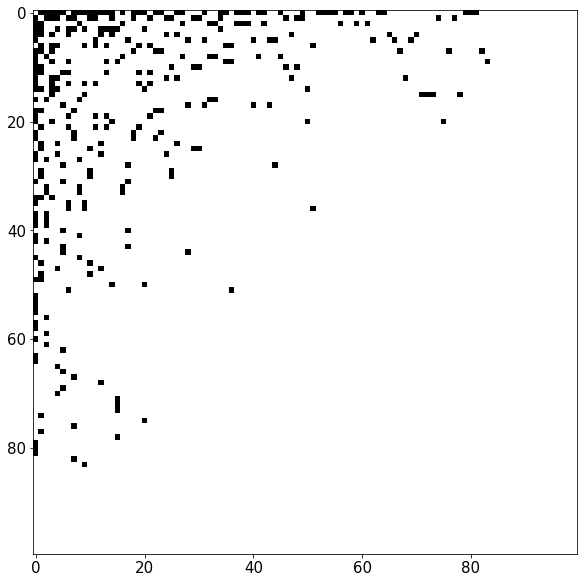

In [67]:
G=nx.from_numpy_array(np.array(simutable[7][46][14]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

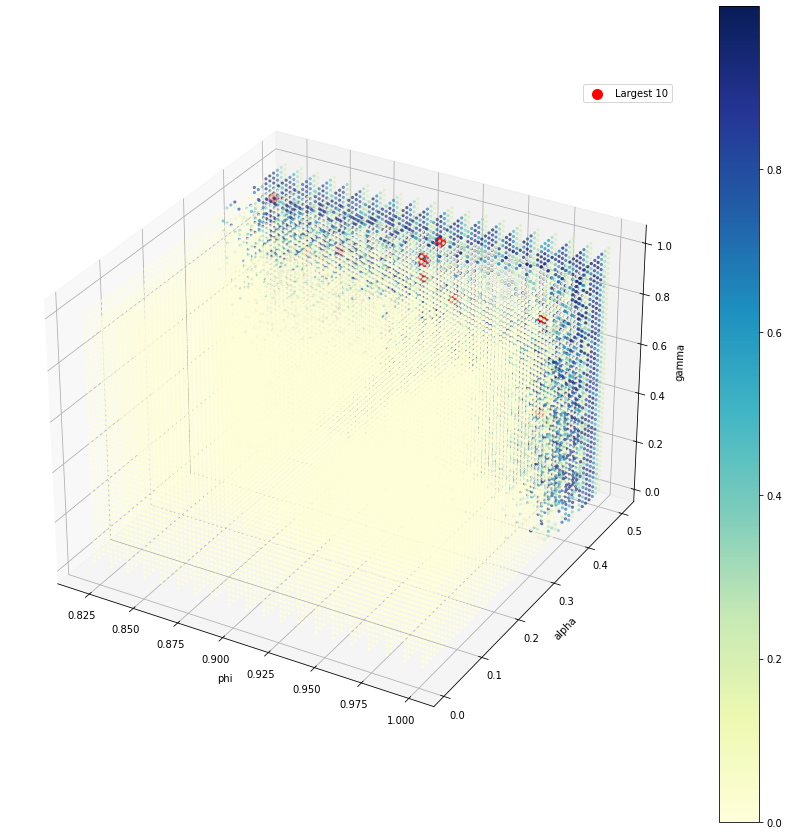

In [55]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -10)[-10:]

# Mark the largest points with red color
ax.scatter(x_flat[indices_largest], y_flat[indices_largest], z_flat[indices_largest],
           c='red', s=100, marker='o', label='Largest 10')

# Show the legend
ax.legend()

plt.show()

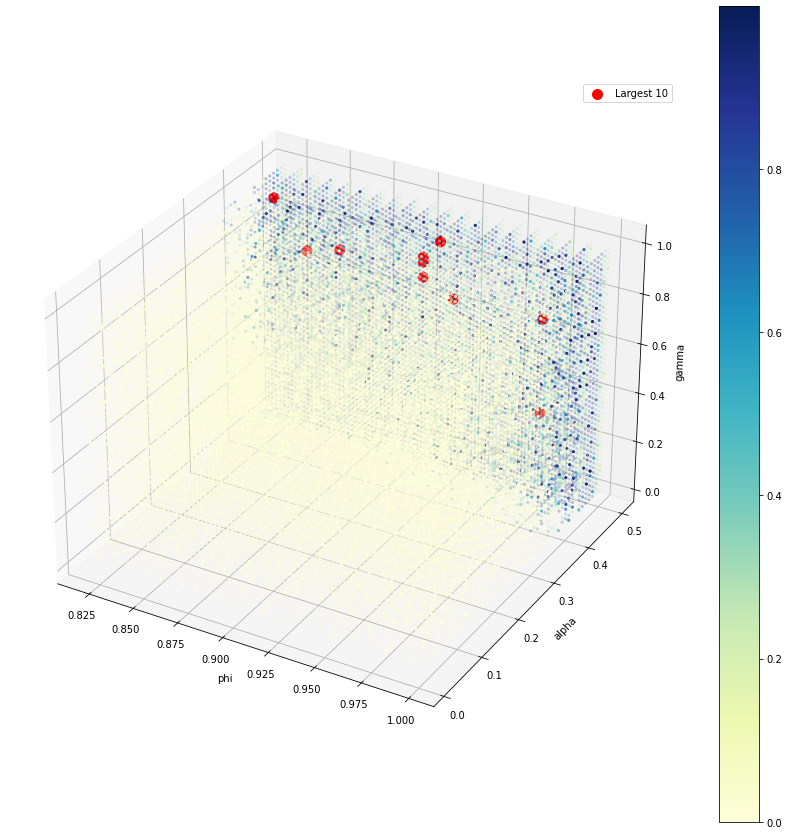

In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.2 + 0.8 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -10)[-10:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest], y_flat[indices_largest], z_flat[indices_largest],
           c='red', s=100, marker='o', label='Largest 10', alpha=1.0)

# Show the legend
ax.legend()

plt.show()

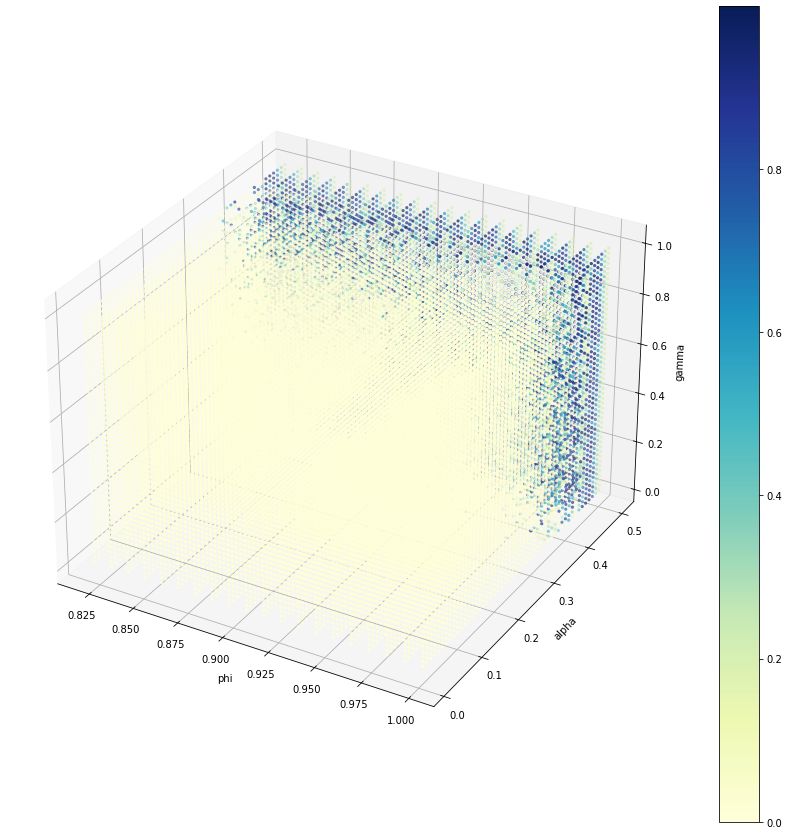

In [57]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat,cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')


In [58]:
# statistical plotting

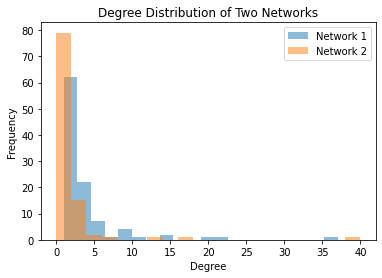

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network 1')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network 2')

plt.title('Degree Distribution of Two Networks')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

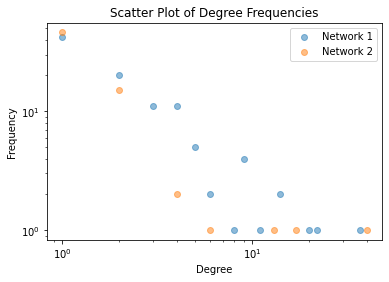

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network 1')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network 2')


plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree Frequencies')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

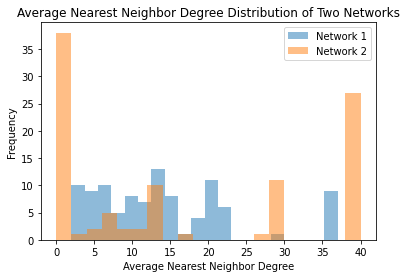

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network 1')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network 2')

plt.title('Average Nearest Neighbor Degree Distribution of Two Networks')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

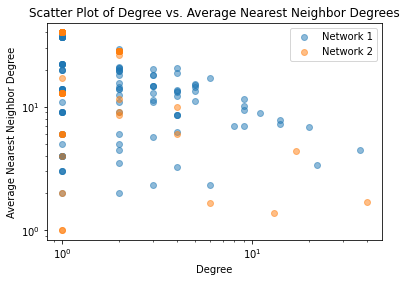

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network 1')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network 2')

plt.xscale('log')
plt.yscale('log')

plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
plt.xlabel('Degree')
plt.ylabel('Average Nearest Neighbor Degree')
plt.legend()
plt.show()



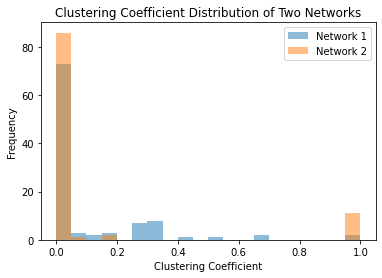

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network 1')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network 2')

plt.title('Clustering Coefficient Distribution of Two Networks')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


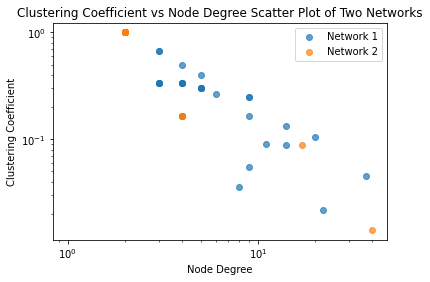

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network 1', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network 2', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


plt.title('Clustering Coefficient vs Node Degree Scatter Plot of Two Networks')
plt.xlabel('Node Degree')
plt.ylabel('Clustering Coefficient')
plt.legend()
plt.show()

